In [1]:
import matplotlib.pyplot as plt
import mpmath
import numpy as np
import pandas as pd

from matplotlib import rc
from scipy.optimize  import minimize
from sklearn import linear_model

In [2]:
labelsize = 14
figsize = (5, 4.5)
ext = "eps"
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
params = {
    'figure.figsize': figsize,
    'font.size' : 12,
    'axes.labelsize': labelsize,
    'legend.fontsize': 12,
}
plt.rcParams.update(params)
# workdir = 'figures/conduit_flow'
# utils.make_dir_if_missing(workdir)

In [3]:
df = pd.read_csv("~/OneDrive/PhD/Complex Analysis/resistance.csv")

In [4]:
def get_features(df, t_w):
    df_0 = df[np.isclose(df['t/w'], t_w)]
    x1 = df_0['s/w'].to_numpy()
    x2 = df_0['t/w'].to_numpy()
    x1.reshape(-1, 1)
    x2.reshape(-1, 1)
    y = df_0['rtilde'].to_numpy()
    y.reshape(-1, 1)
    X = np.ones((x1.shape[0], 2))
    X[:, 0] = x1
    X[:, 1] = x2

    return X, y, x1

In [5]:
def new_features(df, t_w=None):
    df_ = df
    if t_w is not None:
        df_ = df[np.isclose(df['t/w'], t_w)]
    x1 = df_['s/w'].to_numpy()
    x2 = df_['t/w'].to_numpy()
    y = df_['rtilde'].to_numpy()
    x1.reshape(-1, 1)
    x2.reshape(-1, 1)
    y.reshape(-1, 1)
    X = np.ones((len(x1), 2))
    X[:, 0] = x1
    X[:, 1] = x2
    return X, y

In [6]:
model = linear_model.Ridge(alpha=1)

0.9999999856028399 [ 9.99880058e+01 -5.88165608e-26]
0.9999999182908261 [ 9.99912945e+00 -1.70888278e-26]
0.9998647136610618 [1.00446977 0.        ]
0.9979236386958961 [0.51418825 0.        ]
0.9258530287323865 [0.22844511 0.        ]


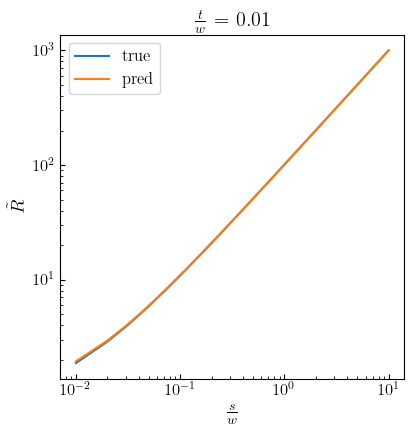

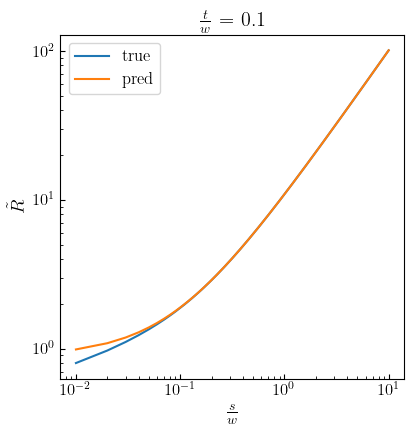

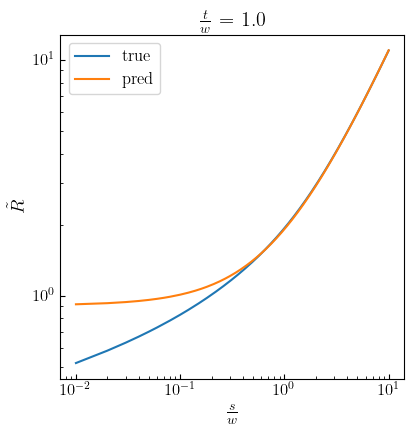

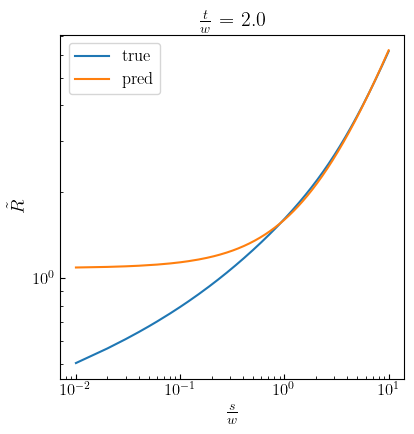

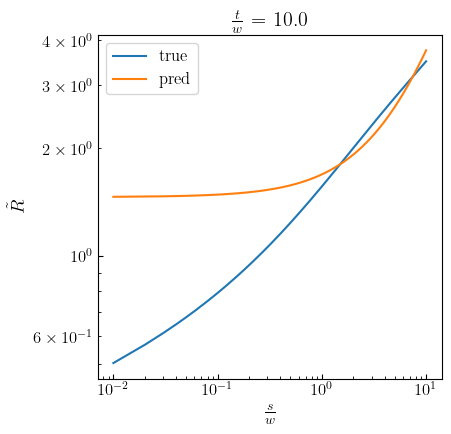

In [7]:
# X, y = new_features(df)
# # model.fit(X, y)
# # print(model.score(X, y), model.coef_)
for t_w in [0.01, 0.1, 1.0, 2.0, 10.0]:
    X, y, x = get_features(df, t_w)
    model.fit(X, y)
    print(model.score(X, y), model.coef_)
    yhat = model.predict(X)
    fig, ax = plt.subplots()
    ax.plot(x, y, label='true')
    ax.plot(x, yhat, label='pred')
    ax.legend()#title=r'$\frac{t}{w}$');
    ax.set_box_aspect(1);
    ax.set_xlabel(r'$\frac{s}{w}$');
    ax.set_ylabel(r'$\tilde{R}$');
    ax.minorticks_on();
    ax.tick_params(axis="both", which="both", direction="in")
    ax.semilogx();
    ax.semilogy();
    plt.title(r'$\frac{t}{w}$' + f' = {t_w}')
    plt.tight_layout();

In [8]:
# fig, ax = plt.subplots()
# ax.plot(x, y, label='true')
# ax.legend()
# ax.set_box_aspect(1);
# ax.set_xlabel(r'$\frac{s}{w}$');
# ax.set_ylabel(r'$\tilde{R}$');
# ax.minorticks_on();
# ax.tick_params(axis="both", which="both", direction="in")
# # ax.semilogx();
# # ax.semilogy();
# plt.title(r'$\frac{t}{w}$' + f' = {t_w}')
# plt.tight_layout();

In [9]:
t_w = 0.10
X, y, x = get_features(df, t_w)

In [10]:
def f(lamda, x):
    a0, a1, a2 = lamda
    return a0 * x[:, 0] + a1 * np.cosh(a2*x[:, 1])

def loss(lamda, x, y):
    yhat = f(lamda, x)
    return np.sum((y - yhat)**2)/len(y)

def g(lamda, x=X, y=y):
    return loss(lamda, x, y)

In [11]:
bad_guess = [10, 0.01, 0.5]
result = minimize(g, bad_guess, method='BFGS')
print(result.x)

[10.00032932  0.87923834  0.50103088]


In [12]:
yhat = f(result.x, X)

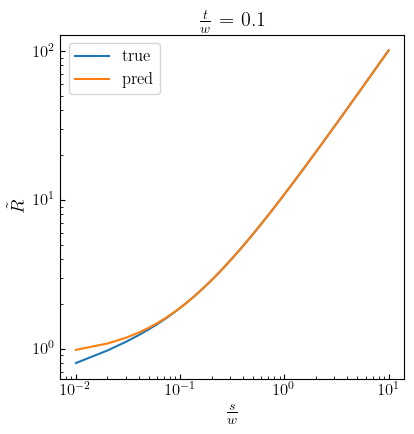

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y, label='true')
ax.plot(x, yhat, label='pred')
ax.legend()
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{s}{w}$');
ax.set_ylabel(r'$\tilde{R}$');
ax.minorticks_on();
ax.tick_params(axis="both", which="both", direction="in")
ax.semilogx();
ax.semilogy();
plt.title(r'$\frac{t}{w}$' + f' = {t_w}')
plt.tight_layout();

In [14]:
error = 100 * np.abs(y- yhat)/y

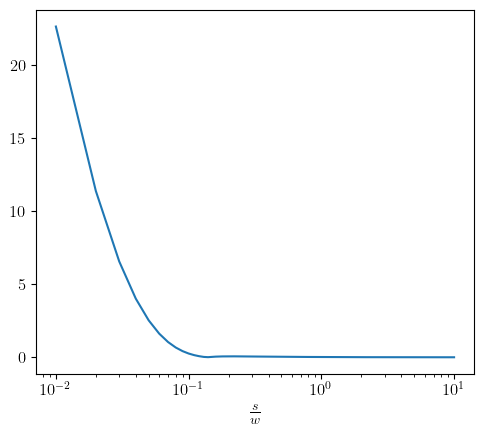

In [15]:
fig, ax = plt.subplots()
ax.plot(x, error);
ax.semilogx();
ax.set_ylabel('% error');
ax.set_xlabel(r'$\frac{s}{w}$');
plt.tight_layout();

In [16]:
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [17]:
def quadratic_parameters(a, b, A, xtilde):
    alpha = (a * np.cos(A)) ** 2 + (b*np.sin(A)) ** 2
    beta = 2*(b**2 - a ** 2) * xtilde
    gamma = -(a*b)**2 + xtilde ** 2 * (b*np.cos(A)**2 + (a*np.sin(A))**2)
    return alpha, beta, gamma

In [18]:
# X1, X2 = example.make_test_ellipse()
X1 = x
X2 = y
X = np.array(list(zip(X1, X2)))
reg = LsqEllipse().fit(X)
center, width, height, phi = reg.as_parameters()

print(f'center: {center[0]:.3f}, {center[1]:.3f}')
print(f'width: {width:.3f}')
print(f'height: {height:.3f}')
print(f'phi: {phi:.3f}')

fig, ax = plt.subplots()

ax.plot(X1, X2, 'ro', zorder=1)
ellipse = Ellipse(
    xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
    edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
)
ax.add_patch(ellipse);
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{s}{w}$')
ax.set_ylabel(r'$\tilde{R}$')
ax.set_xlim([0.01, 10]);
ax.set_ylim([0.1, 4]);
ax.legend();
# ax.semilogx();
# ax.semilogy();
plt.tight_layout();

IndexError: tuple index out of range

In [ ]:
h = 22.035
k = 0.786
a = 21.914
b = 3.317
A = 1.577
x_tilde = x - h
alpha_, beta_, gamma_ = quadratic_parameters(a, b, A, x_tilde)

In [ ]:
def ypred(alpha, beta, gamma):
    return (-beta + np.sqrt(beta ** 2 -4 * alpha * gamma))/(2*alpha)

In [ ]:
yhat3 = k + ypred(alpha_, beta_, gamma_)
fig, ax = plt.subplots()
# ax.plot(x, y, label='true');
ax.plot(x, yhat3, label='pred');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{s}{w}$')
ax.set_ylabel(r'$\tilde{R}$')
# ax.set_xlim([0.01, 10]);
# ax.set_ylim([0.1, 4]);
ax.legend();
# ax.semilogx();
# ax.semilogy();
plt.tight_layout();